##### [Top of page](#toc)

### <a id="ex5-1">Vector exercises</a>

__Note: Do not use loops in any of the following problems.__ It is good coding practice to avoid loops as much as possible:  loops are _much, much_ slower than vector operations.)


__(7)__ A _Bernoulli trial_, consists of a sequence of identical, repeated random experiments where each experiment has 2 possible outcomes. One example of Bernoulli trials is repeated flipping of a coin, where "heads" is counted as a success and "tails" is counted as failure. In this case, the success probability and failure probability are both 1/2.  Other types of gambling games involving dice or spinners can also be considered as Bernoulli trials, in which the probability of failure is not necessarily equal to 1/2. 

If the failure probability is $p$, Then the probability of obtaining $m$ failures in $N$ trials is

$$ p^m(1-p)^{N-m} \frac{N!}{m!(N-m)!} $$

(Note that $m$ must be between 0 and $N$.) Write a program _without loops_ that, given the values of $p$ and $N$, will compute the vector of probabilities of obtaining $m$ failures in $N$ trials for $m=0, \dots N$.


In [5]:
#7
import numpy as np

p = .4
N = 5

# p^m 
p_m = p ** np.arange(N+1)
print("p_m:", p_m, "\n")

#(1-p)^(N-m)
not_p_m = (1-p) ** (N-(np.arange(N+1)))

print("not_p_m:", not_p_m, "\n")

#a= np.arange(N+1)
#b = N - np.arange(N+1)
#print("a:", a)
#print("b:", b)


# Finding m! vector
prep_m = np.ones(N+1)
list_of_indices = np.arange(1, N+1)
#print("list_of_indices:", list_of_indices)

prep_m[list_of_indices] = np.arange(1, N+1)
#print("prep_m", prep_m)

m_fact_vec = np.cumprod(prep_m)
print("m_fact_vec:", m_fact_vec, "\n")


# Finding (N-m)! vector

Nm_fact_vec = m_fact_vec[::-1]
print("Nm_fact_vec:", Nm_fact_vec, "\n")

# Finding N!
N_fact = np.prod(np.arange(1, N+1))
print("N_fact:", N_fact, "\n")


#N choose m is given by
n_C_m = N_fact / (m_fact_vec * Nm_fact_vec)
print("N choose 'm' values:", n_C_m, "\n")

#FINAL RESULT
result = p_m * not_p_m * n_C_m

print("p_m * not_p_m * n_C_m: \n")

print("The probability of m failures in N trials is:", result)

p_m: [1.      0.4     0.16    0.064   0.0256  0.01024] 

not_p_m: [0.07776 0.1296  0.216   0.36    0.6     1.     ] 

m_fact_vec: [  1.   1.   2.   6.  24. 120.] 

Nm_fact_vec: [120.  24.   6.   2.   1.   1.] 

N_fact: 120 

N choose 'm' values: [ 1.  5. 10. 10.  5.  1.] 

p_m * not_p_m * n_C_m: 

The probability of m failures in N trials is: [0.07776 0.2592  0.3456  0.2304  0.0768  0.01024]


##### [Top of page](#toc)

## <a id="ex5-2">Two-dimensional array exercises</a>


__(3)__ _Random sampling_ is a technique often used in simulation. In this exercise, you will generate random samples from a given population. 

   (a) First, create a vector of size `nPop` with `nMale` zero entries and the rest of the entries 1. Call the vector `popVec`--it represents a population of males and females, where 0 represents male and 1 represents female. In your code you may use: `nPop`=20, `nMale` = 7.
   
   (b) Next, create a random vector of `nSam` integers from 0 to `nPop`-1 (call the vector `samVec`). In your code you may use `nSam`=3. This vector corresponds to a random sample from the population (_note_: this is a random sample _with replacement_).
   
   (c) Use `samVec` as an index vector to select a random sample of size `nSam` from the vector `popVec`.

In [10]:
import numpy as np

nPop = 20
nMale = 7
nSam = 3

popVec = np.ones(nPop)
popVec[0:7] = np.zeros(nMale) 
print("popVec:", popVec, "\n")

samVec = np.random.randint(nPop, size = nSam)
print("samVec:", samVec, "\n")

rand_sample = popVec[samVec]
print("random sample:", rand_sample, "\n")

popVec: [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

samVec: [ 1  2 14] 

random sample: [0. 0. 1.] 




### Exercise 8: 
Using `numpy`'s `random.randn()` function, create three different vectors `U,V,` and `W` of length 100 whose entries have the standard normal distribution. Plot a scatter plot that shows the correlation between `U+V` and `U+W` (in other words, U+W on the y-axis versus U+V on the x-axis). 

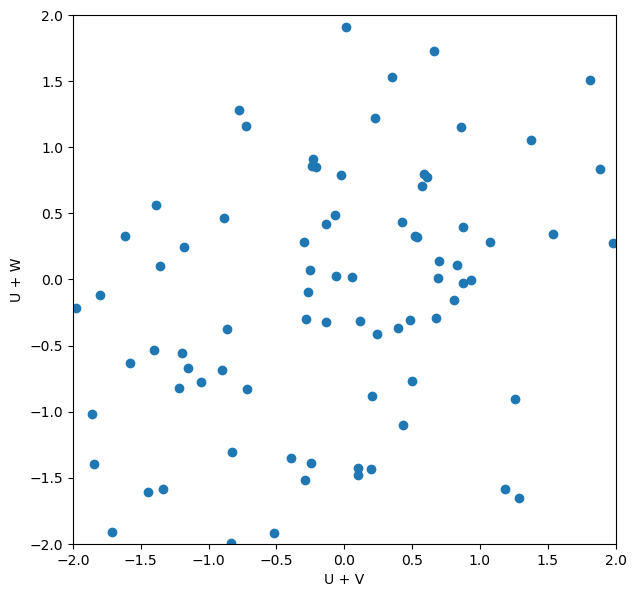

In [11]:
%matplotlib inline    
import numpy as np
import matplotlib.pyplot as plt

U = np.random.randn(100)
V = np.random.randn(100)
W = np.random.randn(100)

x = U + V
y = U + W

plt.figure(figsize = (7,7), dpi = 100)
plt.scatter(x, y)
plt.xlabel('U + V')
plt.ylabel('U + W')


plt.xlim([-2,2])                            # x limits
plt.ylim([-2,2])                           # y limits

plt.show()

#Correlation? No!


### Exercise 12
Make a surface plot of the "saddle function"  $f(x,y) = (x-1)^2 - (y-2)^2$ on the region $0 \le x,y \le 4$. Make your plot using grayscale.  Add a colorbar  to indicate the vertical scale. 

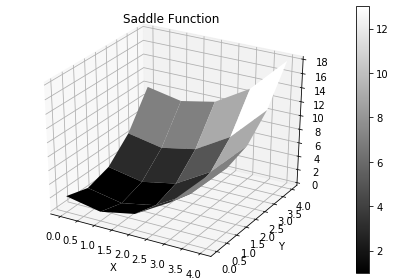

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from mpl_toolkits.mplot3d import Axes3D

#Create data
X = np.arange(5)
Y = np.arange(5)
X, Y = np.meshgrid(X, Y)
R = (((X-1)**2) +((Y-1)**2))
Z = R

fig1 = plt.figure(1)
ax1 = fig1.gca(projection = '3d')
ax1.set_title('Saddle Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plot the surface.
surf = ax1.plot_surface(X, Y, Z, cmap=cm.gray)

# Add a color bar which maps values to colors.
fig1.colorbar(surf)
plt.tight_layout()
